# 필요 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xgboost as xgb
import shap
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
warnings.simplefilter(action='ignore')

# 데이터 불러오기

## Data Dictionary

- survival : 생존 여부 (0 : 사망 / 1 : 생존)
- pclass : ticket에 따른 객실 등급
- sex : 성별
- Age : 나이
- sibsp : 동반한 형제자매와 배우자의 수
- parch : 동반한 부모 자식의 수
- ticket : ticket number
- fare : ticket의 요금
- cabin : 객실 번호
- embarked : 탑승 지역(항) (C : Cherbourg / Q : Queenstown / S : Southampton

In [3]:
train_data = pd.read_csv("./train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_data = pd.read_csv("./test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train_data.info() #데이터 자료형 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- 전체 891개의 data / 12개의 feature / float, int, object 자료형, 결측치 존재

In [6]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- 결측치의 개수 확인 : age 177개 / cabin 687개 / embarked 2개

In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 수치형 데이터 확인
- pclass가 1, 2, 3이 존재하는데, 평균이 2.3이고 50% 분위수가 3인 것을 보아 1보다 2, 3이 많이 존재할 것으로 확인
- age는 평균이 29.6세로, 백분위 수도 함께 확인하였을 때 고령자보다 40대 이하의 사람들이 많이 탔을 것으로 추측
- fare를 확인하면 pclass와 연관지어 생각할 수 있음.

In [8]:
train_data.describe(include=['O']) #범주형 데이터 확인

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


#### 범주형 데이터 확인
- 성별은 남자가 더 많이 탔음.
- ticket, cabin 같은 경우 unique한 data의 개수가 많으므로 사용할 시 label encoding을 사용해야 할 것
- sex, embarked 같은 경우는 one-hot encoding을 사용 예정

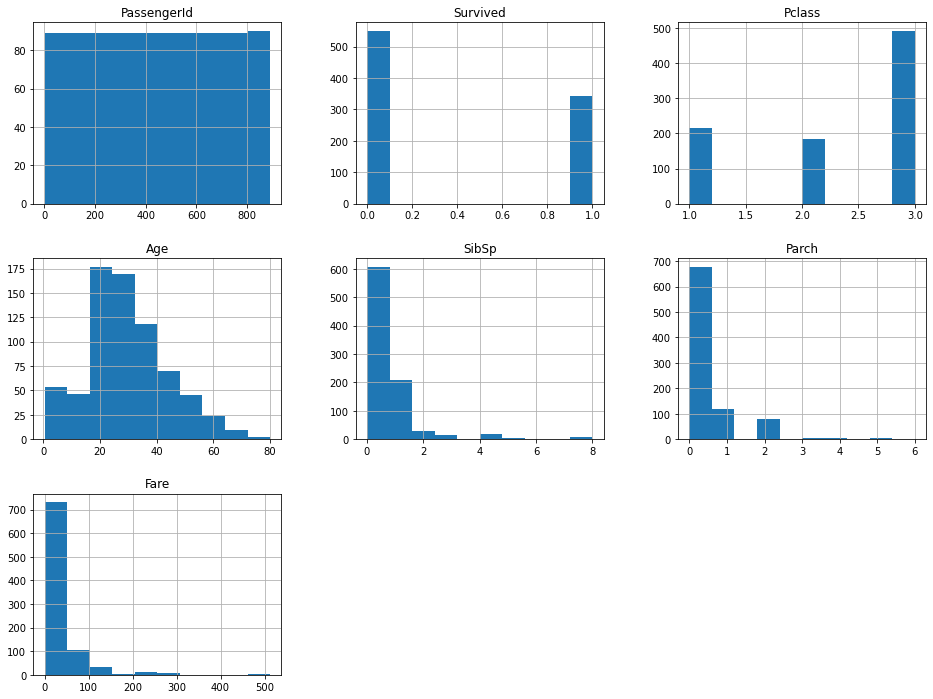

In [9]:
train_data.hist(figsize = (16, 12))
plt.show()

- 예상했던 것과 동일하게 pclass 3이 두배 이상 많은 것을 확인할 수 있음
- age도 고령자보다 40대까지의 나이대가 많음.
- parch, sibsp를 확인해보면 분포가 어느정도 비슷하니 가족단위로 온 사람은 대부분 자식이 1~2명 정도라고 생각.
- fare와 pclass가 현재까지는 관계가 있다고 보고, 정규화를 진행하지 않아도 가중치가 주어져도 괜찮다고 생각하지만 추후 문제를 없애기 위해 정규화를 진행해야할 수 있음.

# 데이터 분석 및 전처리

## 결측치 처리

In [10]:
train_data.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


train_data에서 결측치를 제거해보니 대부분의 데이터가 삭제되는 것을 확인하였으므로 결측치 제거 방식은 사용하지 않는다.

### Cabin 결측치

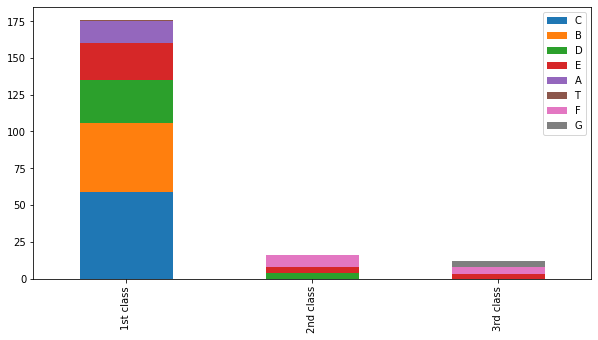

In [11]:
cabin_only = train_data[["Cabin", "Pclass"]].copy()
cabin_only["Cabin"] = cabin_only['Cabin'].str[:1]
Pclass1 = cabin_only[cabin_only['Pclass']==1]['Cabin'].value_counts()
Pclass2 = cabin_only[cabin_only['Pclass']==2]['Cabin'].value_counts()
Pclass3 = cabin_only[cabin_only['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))
plt.show()

'Cabin' column을 살펴보면 Deck이 A, B, C, D, E, F, G, T가 존재하는 것을 볼 수 있다</p>
pclass = 1인 deck은 A, B, C, D, E, T가 존재하고</p>
pclass = 2인 deck은 D, E, F</p>
pclass = 3인 deck은 E, F, G가 있는 것을 확인할 수 있다.</p>
이를 이용하여 Cabin의 결측치를 처리할 것이다.

In [12]:
train_data.loc[(train_data.Pclass==1)&(train_data.Cabin.isnull()),'Cabin']='B'
train_data.loc[(train_data.Pclass==2)&(train_data.Cabin.isnull()),'Cabin']='E'
train_data.loc[(train_data.Pclass==3)&(train_data.Cabin.isnull()),'Cabin']='F'
train_data["Cabin"] = train_data["Cabin"].str.slice(0,1)

In [13]:
train_data['Cabin'].unique()

array(['F', 'C', 'E', 'G', 'D', 'A', 'B', 'T'], dtype=object)

In [14]:
x = train_data[train_data['Cabin']=='T'].index
train_data = train_data.drop(x)

### Age 결측치

In [14]:
age_df = train_data[["Name", "Sex", "Age"]].copy()
age_df

,Name,Sex,Age
0,"Braund, Mr. Owen Harris",male,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,"Allen, Mr. William Henry",male,35.0
...,...,...,...
886,"Montvila, Rev. Juozas",male,27.0
887,"Graham, Miss. Margaret Edith",female,19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN
889,"Behr, Mr. Karl Howell",male,26.0


In [15]:
for x in age_df:
    age_df['Title'] = age_df['Name'].str.extract('([A-za-z]+)\.', expand=False)
    train_data['Title'] = train_data['Name'].str.extract('([A-za-z]+)\.', expand=False)
print(age_df['Title'].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64


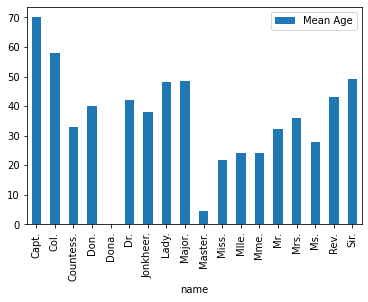

In [16]:
Capt = age_df.loc[age_df.Title == 'Capt', 'Age'].mean()
Col = age_df.loc[age_df.Title == 'Col', 'Age'].mean()
Countess = age_df.loc[age_df.Title == 'Countess', 'Age'].mean()
Don = age_df.loc[age_df.Title == 'Don', 'Age'].mean()
Dona = age_df.loc[age_df.Title == 'Dona', 'Age'].mean()
Dr = age_df.loc[age_df.Title == 'Dr', 'Age'].mean()
Jonkheer = age_df.loc[age_df.Title == 'Jonkheer', 'Age'].mean()
Lady = age_df.loc[age_df.Title == 'Lady', 'Age'].mean()
Major = age_df.loc[age_df.Title == 'Major', 'Age'].mean()
Master = age_df.loc[age_df.Title == 'Master', 'Age'].mean()
Miss = age_df.loc[age_df.Title == 'Miss', 'Age'].mean()
Mlle = age_df.loc[age_df.Title == 'Mlle', 'Age'].mean()
Mme = age_df.loc[age_df.Title == 'Mme', 'Age'].mean()
Mr = age_df.loc[age_df.Title == 'Mr', 'Age'].mean()
Mrs = age_df.loc[age_df.Title == 'Mrs', 'Age'].mean()
Ms = age_df.loc[age_df.Title == 'Ms', 'Age'].mean()
Rev = age_df.loc[age_df.Title == 'Rev', 'Age'].mean()
Sir = age_df.loc[age_df.Title == 'Sir', 'Age'].mean()

df = pd.DataFrame({'Mean Age' : [Capt, Col, Countess, Don, Dona, Dr, Jonkheer, Lady
                             , Major, Master, Miss, Mlle, Mme, Mr, Mrs, Ms, Rev, Sir]})
df.index = ['Capt.', 'Col.', 'Countess.', 'Don.', 'Dona.', 'Dr.', 'Jonkheer.',
            'Lady.', 'Major.', 'Master.', 'Miss.', 'Mlle.', 'Mme.',
            'Mr.', 'Mrs.', 'Ms.', 'Rev.', 'Sir.']
ax = df.plot(kind = 'bar', figsize=(6,4))
ax.set_xlabel("name")
plt.show()

Age 결측치같은 경우 Name의 title을 이용하여 추측할 수 있다. </p>
title과 함께 fare, sipsp, parch도 함께 이용하면 더욱 정확한 추측을 할 수 있지만....^^</p>
각 name의 title만 추출해서 column을 만든 뒤 평균을 비교해보았다.</p>
이를 이용하여 age의 결측치를 채웠다.</p>

In [17]:
train_data.loc[(train_data.Title=='Capt')&(train_data.Age.isnull()),'Age'] = Capt
train_data.loc[(train_data.Title=='Col')&(train_data.Age.isnull()),'Age'] = Col
train_data.loc[(train_data.Title=='Countess')&(train_data.Age.isnull()),'Age'] = Countess
train_data.loc[(train_data.Title=='Don')&(train_data.Age.isnull()),'Age'] = Don
train_data.loc[(train_data.Title=='Dona')&(train_data.Age.isnull()),'Age'] = Dona
train_data.loc[(train_data.Title=='Dr')&(train_data.Age.isnull()),'Age'] = Dr
train_data.loc[(train_data.Title=='Jonkheer')&(train_data.Age.isnull()),'Age'] = Jonkheer
train_data.loc[(train_data.Title=='Lady')&(train_data.Age.isnull()),'Age'] = Lady
train_data.loc[(train_data.Title=='Major')&(train_data.Age.isnull()),'Age'] = Major
train_data.loc[(train_data.Title=='Master')&(train_data.Age.isnull()),'Age'] = Master
train_data.loc[(train_data.Title=='Miss')&(train_data.Age.isnull()),'Age'] = Miss
train_data.loc[(train_data.Title=='Mlle')&(train_data.Age.isnull()),'Age'] = Mlle
train_data.loc[(train_data.Title=='Mme')&(train_data.Age.isnull()),'Age'] = Mme
train_data.loc[(train_data.Title=='Mr')&(train_data.Age.isnull()),'Age'] = Mr
train_data.loc[(train_data.Title=='Mrs')&(train_data.Age.isnull()),'Age'] = Mrs
train_data.loc[(train_data.Title=='Ms')&(train_data.Age.isnull()),'Age'] = Ms
train_data.loc[(train_data.Title=='Rev')&(train_data.Age.isnull()),'Age'] = Rev
train_data.loc[(train_data.Title=='Sir')&(train_data.Age.isnull()),'Age'] = Sir

### Embarked

In [18]:
train_data[train_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B,NaN,Mrs


전체 데이터 약 900개 중 결측치가 2개만 존재하고, 특별히 다른 column과의 연관성을 찾지 못하여 최빈값으로 결측치 처리를 하였다. 

In [19]:
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

In [20]:
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

3개의 column에 대한 결측치 처리를 완료하였다.

## 데이터 전처리(범주형 데이터)

In [21]:
train_data.drop(['PassengerId', 'Name'], axis = 1, inplace = True)
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,F,S,Mr
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C,C,Mrs
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,F,S,Miss
3,1,1,female,35.000000,1,0,113803,53.1000,C,S,Mrs
4,0,3,male,35.000000,0,0,373450,8.0500,F,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,E,S,Rev
887,1,1,female,19.000000,0,0,112053,30.0000,B,S,Miss
888,0,3,female,21.773973,1,2,W./C. 6607,23.4500,F,S,Miss
889,1,1,male,26.000000,0,0,111369,30.0000,C,C,Mr


- passengerID같은 경우 주어진 정보 내에서 특별히 연관성이 있지 않을 것으로 판단하였다.
- Name은 이름 중 유용한 정보로 추측되는 title을 추출하였기 때문에 ID와 함께 drop하였다.

In [22]:
lab_enc = LabelEncoder()
train_data['Ticket'] = lab_enc.fit_transform(train_data['Ticket'])
train_data['Title'] = lab_enc.fit_transform(train_data['Title'])
train_data['Cabin'] = lab_enc.fit_transform(train_data['Cabin'])
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,22.000000,1,0,523,7.2500,5,S,12
1,1,1,female,38.000000,1,0,596,71.2833,2,C,13
2,1,3,female,26.000000,0,0,669,7.9250,5,S,9
3,1,1,female,35.000000,1,0,49,53.1000,2,S,13
4,0,3,male,35.000000,0,0,472,8.0500,5,S,12
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,101,13.0000,4,S,15
887,1,1,female,19.000000,0,0,14,30.0000,1,S,9
888,0,3,female,21.773973,1,2,675,23.4500,5,S,9
889,1,1,male,26.000000,0,0,8,30.0000,2,C,12


- 먼저 Ticket같은 경우 약 660개의 data가 존재하고, cabin도 8개라 one-hot encoding을 해도 되지만 column이 많아질 수 있기 때문에 두 feature에 label encoding을 진행하였다.

In [23]:
train_data = pd.get_dummies(train_data)

- 이 외의 sex, embarked는 one-hot encoding을 진행하였다.

In [24]:
train_data.loc[(train_data.Age >= 0)&(train_data.Age < 16), 'Age'] = 1
train_data.loc[(train_data.Age >= 16)&(train_data.Age < 32), 'Age'] = 2
train_data.loc[(train_data.Age >= 32)&(train_data.Age < 48), 'Age'] = 3
train_data.loc[(train_data.Age >= 48)&(train_data.Age < 64), 'Age'] = 4
train_data.loc[(train_data.Age >= 64)&(train_data.Age <= 80), 'Age'] = 5

In [25]:
train_data

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,2.0,1,0,523,7.2500,5,12,0,1,0,0,1
1,1,1,3.0,1,0,596,71.2833,2,13,1,0,1,0,0
2,1,3,2.0,0,0,669,7.9250,5,9,1,0,0,0,1
3,1,1,3.0,1,0,49,53.1000,2,13,1,0,0,0,1
4,0,3,3.0,0,0,472,8.0500,5,12,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,2.0,0,0,101,13.0000,4,15,0,1,0,0,1
887,1,1,2.0,0,0,14,30.0000,1,9,1,0,0,0,1
888,0,3,2.0,1,2,675,23.4500,5,9,1,0,0,0,1
889,1,1,2.0,0,0,8,30.0000,2,12,0,1,1,0,0


- 주어진 data의 모든 column이 수치형 데이터로 전환이 되었다.

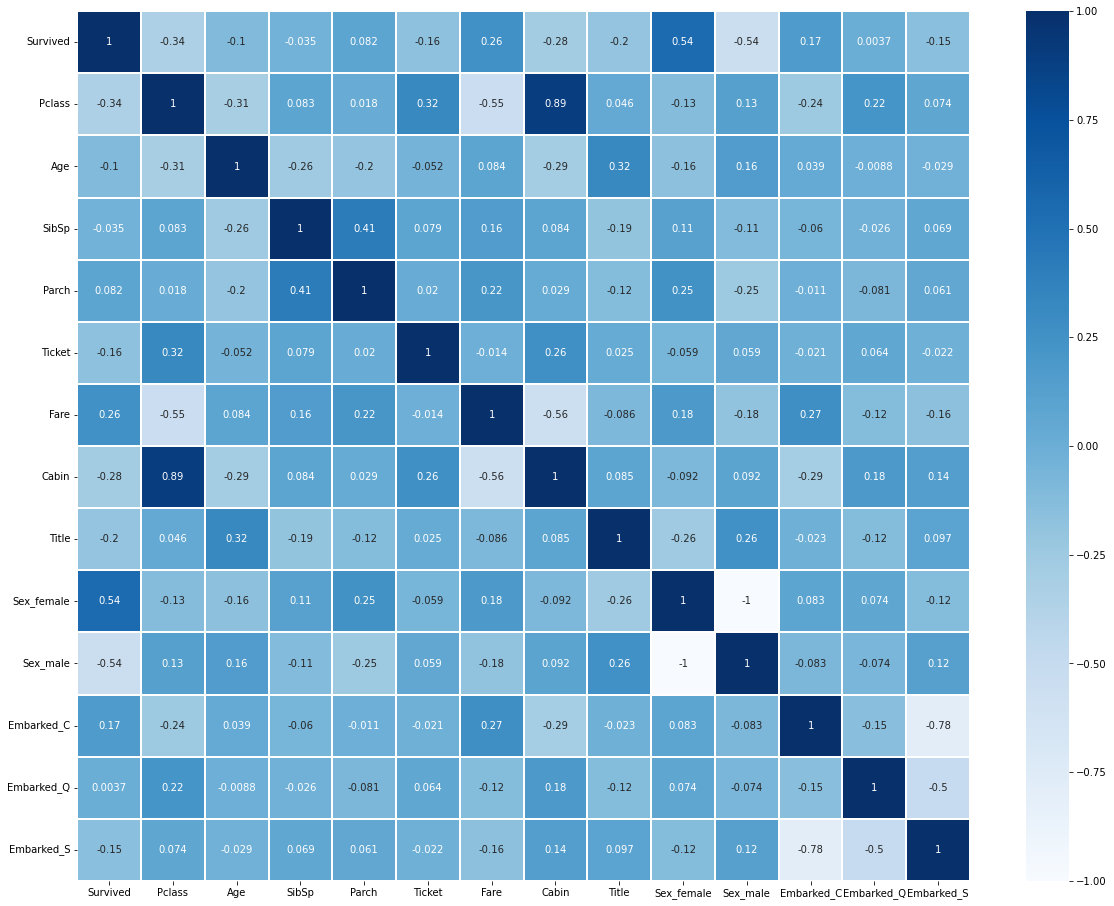

In [25]:
plt.figure(figsize = (20, 16))
x = sns.heatmap(train_data.corr(), cmap = 'Blues', linewidths = '0.1',annot = True)

각 column들의 상관계수를 heatmap을 이용하여 한눈에 보기 편하게 시각화하였다.
- cabin과 pclass는 0.89의 높은 상관관계를 가지고 있다.
- embarked끼리도 어느정도 관계가 존재한다.
- Sex male과 female의 경우 상관관계가 1인데, 이는 한 column을 확정을 했을 때 다른 column이 필요하지 않게 되는 경우이므로 추후 feature를 제거할 것이다.
- target value인 survived와의 관계를 확인해보면 sex가 연관성이 많은 것으로 확인된다.

In [27]:
sns.pairplot(train_data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 
                                  'Cabin', 'Title', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
                                  'Embarked_S']] ,hue='Survived', palette='husl', markers=['o','s'])
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001D2313324C0> (for post_execute):


KeyboardInterrupt: 

- 남자가 여자보다 생존률이 현저히 낮음
- 청년층(2~30대) 생존률이 낮은 편
- pclass 3이 생존률이 제일 낮음
- ticket 중반 부분이 생존률이 낮은편
- fare이 낮은 사람들이 생존률이 낮음
- 특정 title이 생존률이 현저히 낮음
- 탑승 장소에 대해서도 약 2배가량 생존률 차이가 있음을 확인 가능

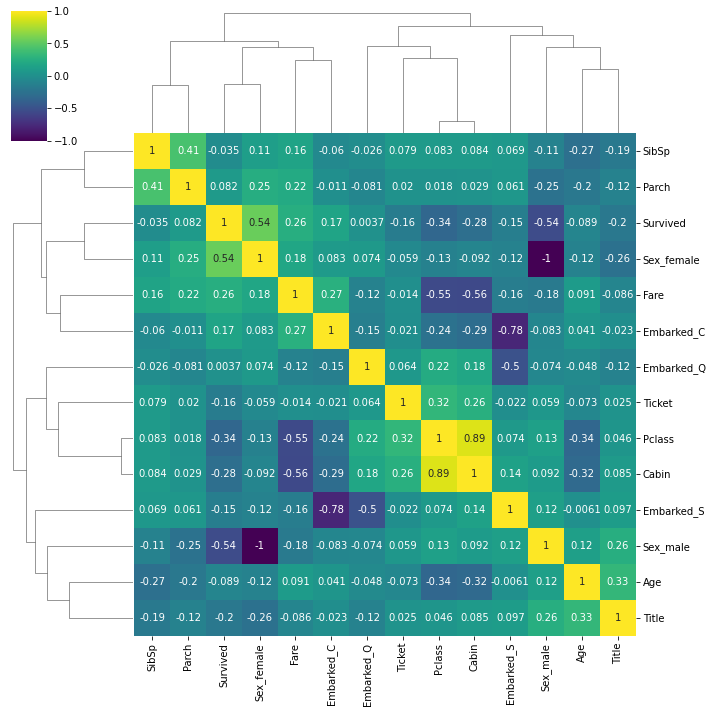

In [28]:
sns.clustermap(train_data.corr(), annot=True, cmap='viridis')
plt.show()

In [26]:
scaler = preprocessing.MinMaxScaler()
normalized_data = scaler.fit_transform(train_data)
col = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Title', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
normalized_df = pd.DataFrame(normalized_data, columns = col)
normalized_df

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.25,0.125,0.000000,0.769118,0.014151,0.714286,0.7500,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.50,0.125,0.000000,0.876471,0.139136,0.285714,0.8125,1.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.25,0.000,0.000000,0.983824,0.015469,0.714286,0.5625,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.50,0.125,0.000000,0.072059,0.103644,0.285714,0.8125,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.50,0.000,0.000000,0.694118,0.015713,0.714286,0.7500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.25,0.000,0.000000,0.148529,0.025374,0.571429,0.9375,0.0,1.0,0.0,0.0,1.0
887,1.0,0.0,0.25,0.000,0.000000,0.020588,0.058556,0.142857,0.5625,1.0,0.0,0.0,0.0,1.0
888,0.0,1.0,0.25,0.125,0.333333,0.992647,0.045771,0.714286,0.5625,1.0,0.0,0.0,0.0,1.0
889,1.0,0.0,0.25,0.000,0.000000,0.011765,0.058556,0.285714,0.7500,0.0,1.0,1.0,0.0,0.0


# 모델 학습

In [27]:
y_target = normalized_df['Survived']
x_data = normalized_df.drop(['Sex_male', 'Embarked_Q', 'Embarked_C', 'Survived'], axis = 1)

In [194]:
y_target = train_data['Survived']
x_data = train_data.drop(['Sex_male', 'Embarked_Q', 'Survived'], axis = 1)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size = 0.2, random_state = 4)

In [29]:
params = {
    'max_depth':[4, 6, 8, 10, 12],
    'min_child_weight':[4, 6, 8, 10],
    'gamma' : [0, 1, 2],
    'colsample_bytree':[0.7, 0.8, 0.9],
    'n_estimators':[10, 50, 100, 200, 300],
    'eta' : [0.1, 0.15, 0.2, 0.3]
}

grid_xgb_clf = xgb.XGBClassifier(random_state = 4, n_jobs = -1)
grid_cv = GridSearchCV(grid_xgb_clf, param_grid = params, cv = 5, n_jobs = -1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'colsample_bytree': 0.7, 'eta': 0.3, 'gamma': 0, 'max_depth': 4, 'min_child_weight': 6, 'n_estimators': 50}
최고 예측 정확도: 0.8273


In [31]:
xgb_model = xgb.XGBClassifier(eta = 0.15, gamma = 0, max_depth = 8, min_child_weight = 4, n_estimators = 10, colsample_bytree = 0.7)

xgb_model.fit(x_train,y_train)
prediction = xgb_model.predict(x_test)
xgb_score = xgb_model.score(x_test, y_test)
xgb_score

0.848314606741573

In [30]:
xgb_model = xgb.XGBClassifier(eta = 0.3, gamma = 0, max_depth = 4, min_child_weight = 6, n_estimators = 50, colsample_bytree = 0.7)

xgb_model.fit(x_train,y_train)
prediction = xgb_model.predict(x_test)
xgb_score = xgb_model.score(x_test, y_test)
xgb_score

0.8715083798882681

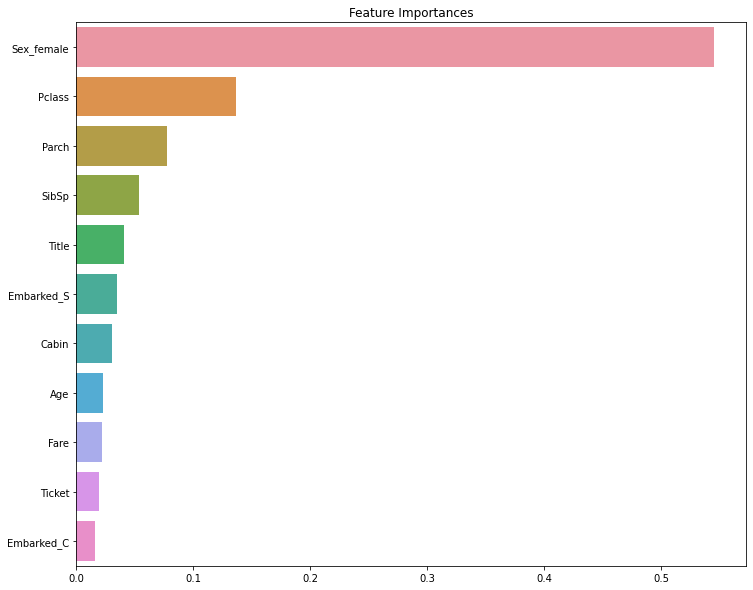

In [36]:
# feature importance

ftr_importances_values = xgb_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_sort = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
sns.barplot(x=ftr_sort, y=ftr_sort.index)
plt.show()

In [32]:
explainer = shap.TreeExplainer(xgb_model) # 트리 모델 Shap Value 계산 객체 지정
shap_values = explainer.shap_values(x_train)

In [33]:
shap.initjs() # 자바스크립트 초기화 (그래프 초기화)
shap.force_plot(explainer.expected_value, shap_values[1,:], x_train.iloc[1,:]) 
# 첫 번째 검증 데이터 인스턴스에 대해 Shap Value를 적용하여 시각화
# 빨간색이 영향도가 높으며, 파란색이 영향도가 낮음

In [34]:
shap.force_plot(explainer.expected_value, shap_values, x_train)

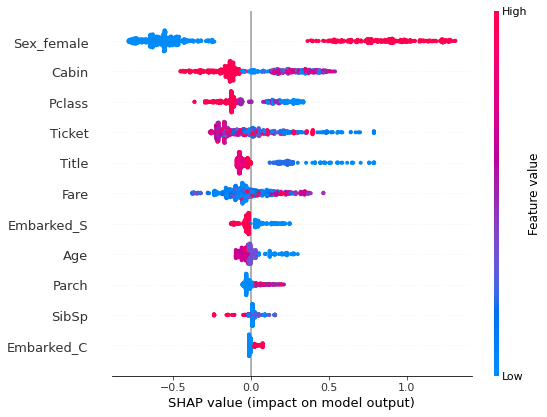

In [35]:
shap.summary_plot(shap_values, x_train)

In [60]:
shap.summary_plot(shap_values, x_train, plot_type = "bar") # 각 변수에 대한 Shap Values의 절대값으로 중요도 파악

NameError: name 'shap_values' is not defined

# Test data 적용

In [31]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [32]:
test_data.loc[(test_data.Pclass==1)&(test_data.Cabin.isnull()),'Cabin']='B'
test_data.loc[(test_data.Pclass==2)&(test_data.Cabin.isnull()),'Cabin']='E'
test_data.loc[(test_data.Pclass==3)&(test_data.Cabin.isnull()),'Cabin']='F'
test_data["Cabin"] = test_data["Cabin"].str.slice(0,1)

In [33]:
test_data['Cabin'].unique()

array(['F', 'E', 'B', 'A', 'C', 'D', 'G'], dtype=object)

In [34]:
age_df = test_data[["Name", "Sex", "Age"]].copy()
age_df

,Name,Sex,Age
0,"Kelly, Mr. James",male,34.5
1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0
2,"Myles, Mr. Thomas Francis",male,62.0
3,"Wirz, Mr. Albert",male,27.0
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0
...,...,...,...
413,"Spector, Mr. Woolf",male,NaN
414,"Oliva y Ocana, Dona. Fermina",female,39.0
415,"Saether, Mr. Simon Sivertsen",male,38.5
416,"Ware, Mr. Frederick",male,NaN


In [35]:
for x in age_df:
    age_df['Title'] = age_df['Name'].str.extract('([A-za-z]+)\.', expand=False)
    test_data['Title'] = test_data['Name'].str.extract('([A-za-z]+)\.', expand=False)
print(age_df['Title'].value_counts())

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64


In [36]:
Col = age_df.loc[age_df.Title == 'Col', 'Age'].mean()
Dona = age_df.loc[age_df.Title == 'Dona', 'Age'].mean()
Dr = age_df.loc[age_df.Title == 'Dr', 'Age'].mean()
Master = age_df.loc[age_df.Title == 'Master', 'Age'].mean()
Miss = age_df.loc[age_df.Title == 'Miss', 'Age'].mean()
Mr = age_df.loc[age_df.Title == 'Mr', 'Age'].mean()
Mrs = age_df.loc[age_df.Title == 'Mrs', 'Age'].mean()
Ms = age_df.loc[age_df.Title == 'Ms', 'Age'].mean()
Rev = age_df.loc[age_df.Title == 'Rev', 'Age'].mean()

In [37]:
test_data.loc[(test_data.Title=='Col')&(test_data.Age.isnull()),'Age'] = Col
test_data.loc[(test_data.Title=='Dona')&(test_data.Age.isnull()),'Age'] = Dona
test_data.loc[(test_data.Title=='Dr')&(test_data.Age.isnull()),'Age'] = Dr
test_data.loc[(test_data.Title=='Master')&(test_data.Age.isnull()),'Age'] = Master
test_data.loc[(test_data.Title=='Miss')&(test_data.Age.isnull()),'Age'] = Miss
test_data.loc[(test_data.Title=='Mr')&(test_data.Age.isnull()),'Age'] = Mr
test_data.loc[(test_data.Title=='Mrs')&(test_data.Age.isnull()),'Age'] = Mrs
test_data.loc[(test_data.Title=='Ms')&(test_data.Age.isnull()),'Age'] = Ms
test_data.loc[(test_data.Title=='Rev')&(test_data.Age.isnull()),'Age'] = Rev

In [38]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            1
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
Title          0
dtype: int64

In [39]:
test_data['Age'] = test_data['Age'].fillna(0)
test_data['Fare'] = test_data['Fare'].fillna(0)

In [40]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,F,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,F,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,E,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,F,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,F,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,32.000000,0,0,A.5. 3236,8.0500,F,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C,C,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,F,S,Mr
416,1308,3,"Ware, Mr. Frederick",male,32.000000,0,0,359309,8.0500,F,S,Mr


In [41]:
test_data.drop(['PassengerId', 'Name'], axis = 1, inplace = True)
test_data

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,male,34.500000,0,0,330911,7.8292,F,Q,Mr
1,3,female,47.000000,1,0,363272,7.0000,F,S,Mrs
2,2,male,62.000000,0,0,240276,9.6875,E,Q,Mr
3,3,male,27.000000,0,0,315154,8.6625,F,S,Mr
4,3,female,22.000000,1,1,3101298,12.2875,F,S,Mrs
...,...,...,...,...,...,...,...,...,...,...
413,3,male,32.000000,0,0,A.5. 3236,8.0500,F,S,Mr
414,1,female,39.000000,0,0,PC 17758,108.9000,C,C,Dona
415,3,male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,F,S,Mr
416,3,male,32.000000,0,0,359309,8.0500,F,S,Mr


In [42]:
lab_enc = LabelEncoder()
test_data['Ticket'] = lab_enc.fit_transform(test_data['Ticket'])
test_data['Title'] = lab_enc.fit_transform(test_data['Title'])
test_data['Cabin'] = lab_enc.fit_transform(test_data['Cabin'])

In [43]:
test_data = pd.get_dummies(test_data)

In [44]:
test_data

,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.500000,0,0,152,7.8292,5,5,0,1,0,1,0
1,3,47.000000,1,0,221,7.0000,5,6,1,0,0,0,1
2,2,62.000000,0,0,73,9.6875,4,5,0,1,0,1,0
3,3,27.000000,0,0,147,8.6625,5,5,0,1,0,0,1
4,3,22.000000,1,1,138,12.2875,5,6,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,32.000000,0,0,267,8.0500,5,5,0,1,0,0,1
414,1,39.000000,0,0,324,108.9000,2,1,1,0,1,0,0
415,3,38.500000,0,0,346,7.2500,5,5,0,1,0,0,1
416,3,32.000000,0,0,220,8.0500,5,5,0,1,0,0,1


In [45]:
test_data.loc[(test_data.Age >= 0)&(test_data.Age < 16), 'Age'] = 1
test_data.loc[(test_data.Age >= 16)&(test_data.Age < 32), 'Age'] = 2
test_data.loc[(test_data.Age >= 32)&(test_data.Age < 48), 'Age'] = 3
test_data.loc[(test_data.Age >= 48)&(test_data.Age < 64), 'Age'] = 4
test_data.loc[(test_data.Age >= 64)&(test_data.Age <= 80), 'Age'] = 5
test_data

,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,3.0,0,0,152,7.8292,5,5,0,1,0,1,0
1,3,3.0,1,0,221,7.0000,5,6,1,0,0,0,1
2,2,4.0,0,0,73,9.6875,4,5,0,1,0,1,0
3,3,2.0,0,0,147,8.6625,5,5,0,1,0,0,1
4,3,2.0,1,1,138,12.2875,5,6,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,3.0,0,0,267,8.0500,5,5,0,1,0,0,1
414,1,3.0,0,0,324,108.9000,2,1,1,0,1,0,0
415,3,3.0,0,0,346,7.2500,5,5,0,1,0,0,1
416,3,3.0,0,0,220,8.0500,5,5,0,1,0,0,1


In [46]:
scaler = preprocessing.MinMaxScaler()
normalized_test_data = scaler.fit_transform(test_data)
col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Title', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
test_normalized_df = pd.DataFrame(normalized_test_data, columns = col)
test_normalized_df

,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.50,0.000,0.000000,0.419890,0.015282,0.833333,0.625,0.0,1.0,0.0,1.0,0.0
1,1.0,0.50,0.125,0.000000,0.610497,0.013663,0.833333,0.750,1.0,0.0,0.0,0.0,1.0
2,0.5,0.75,0.000,0.000000,0.201657,0.018909,0.666667,0.625,0.0,1.0,0.0,1.0,0.0
3,1.0,0.25,0.000,0.000000,0.406077,0.016908,0.833333,0.625,0.0,1.0,0.0,0.0,1.0
4,1.0,0.25,0.125,0.111111,0.381215,0.023984,0.833333,0.750,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1.0,0.50,0.000,0.000000,0.737569,0.015713,0.833333,0.625,0.0,1.0,0.0,0.0,1.0
414,0.0,0.50,0.000,0.000000,0.895028,0.212559,0.333333,0.125,1.0,0.0,1.0,0.0,0.0
415,1.0,0.50,0.000,0.000000,0.955801,0.014151,0.833333,0.625,0.0,1.0,0.0,0.0,1.0
416,1.0,0.50,0.000,0.000000,0.607735,0.015713,0.833333,0.625,0.0,1.0,0.0,0.0,1.0


In [49]:
test_normalized_df = test_normalized_df.drop(['Sex_male', 'Embarked_Q', 'Embarked_C'], axis = 1)

KeyError: "['Sex_male' 'Embarked_Q' 'Embarked_C'] not found in axis"

In [153]:
test_data = test_data.drop(['Sex_male', 'Embarked_Q'], axis = 1)

In [51]:
xgb_pred = xgb_model.predict(test_normalized_df)
xgb_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [52]:
sample_submission = pd.read_csv('./gender_submission.csv')
sample_submission['Survived'] = xgb_pred
sample_submission.to_csv('submission.csv',index = False)
sample_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
